## <font color='green'> <div align="center">In the name of God </div></font>

### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi</font> <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> 

### Learning Vector Quantization

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
MnistTrainX = sio.loadmat ('../../datasets/mnist/MnistTrainX')['MnistTrainX'] / 255;
MnistTrainY = sio.loadmat ('../../datasets/mnist/MnistTrainY')['MnistTrainY'];
MnistTestX  = sio.loadmat ('../../datasets/mnist/MnistTestX')['MnistTestX'] / 255;
MnistTestY  = sio.loadmat ('../../datasets/mnist/MnistTestY')['MnistTestY'];

In [3]:
XTrain = MnistTrainX
yTrain = MnistTrainY

In [4]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 600

In [5]:
def vq(X, K, maxIteration, minChangeRatio):
    (N, d) = X.shape
    # Initialize centers
    c = np.random.rand(K, d) * 0.1
    J_old = np.inf
    for i in range(maxIteration):
        dist = np.zeros([N, K])
        for j in range(K):
            cj = np.array(c[j, :], ndmin=2)
            cj_repeated = np.repeat(cj, N, axis=0)
            d = X - cj_repeated
            d **= 2
            d = np.sum(d, axis=1)
            dist[:, j] = d
        S = np.argmin(dist, axis=1)
        J = np.sum (dist[range(N),S])
        #print ('VQ objective function:   ', J)
        if (J_old - J < minChangeRatio * J_old):
            break
        J_old = J
        if i != maxIteration - 1:
            for j in range(K):
                index = (S == j)
                Xj = X[index, :]
                if (Xj.shape[0] > 0):
                    cj = np.mean(Xj, axis=0)
                else:
                    print ('Empty Cluster')                
                c[j, :] = cj        
    return (c, S)

In [6]:
def lvq (X, T, K, learning_rate, lvq_maxEpoch, vq_maxIteration, vq_minChangeRatio):
    (N,d) = X.shape
    c = np.zeros([C*K,d])
    for i in range (C):
        idx = T == i
        idx = idx.reshape(idx.shape[0])
        X_i = X[idx,:]
        c_i, _ = vq(X_i,K,vq_maxIteration, vq_minChangeRatio)
        c[i*K:(i+1)*K,:] = c_i
    
    for i in range (lvq_maxEpoch):
        for j in range (N):
            x = np.array(X[j,:],dtype=float, ndmin = 2)            
            t = T[j]
            x_repeated = np.repeat(x,C*K, axis = 0)
            d = c - x_repeated
            d **= 2
            d = np.sum(d, axis = 1)
            min_idx = np.argmin(d)
            y = int (min_idx / K)
            x = X[j,:]
            if (y == t):
                c[min_idx,:] += learning_rate * (x - c[min_idx,:]);
            else:
                c[min_idx,:] -= learning_rate * (x - c[min_idx,:]);
    return c 

In [18]:
idx = MnistTrainY.squeeze() != 100
XTrain = MnistTrainX[idx,:]

In [19]:
K = 7
C = 10
vq_maxIteration = 3
vq_minChangeRatio = 0.01
learning_rate = 0.01
lvq_maxEpoch = 10
c = lvq(XTrain, yTrain, K, learning_rate, lvq_maxEpoch, vq_maxIteration, vq_minChangeRatio)

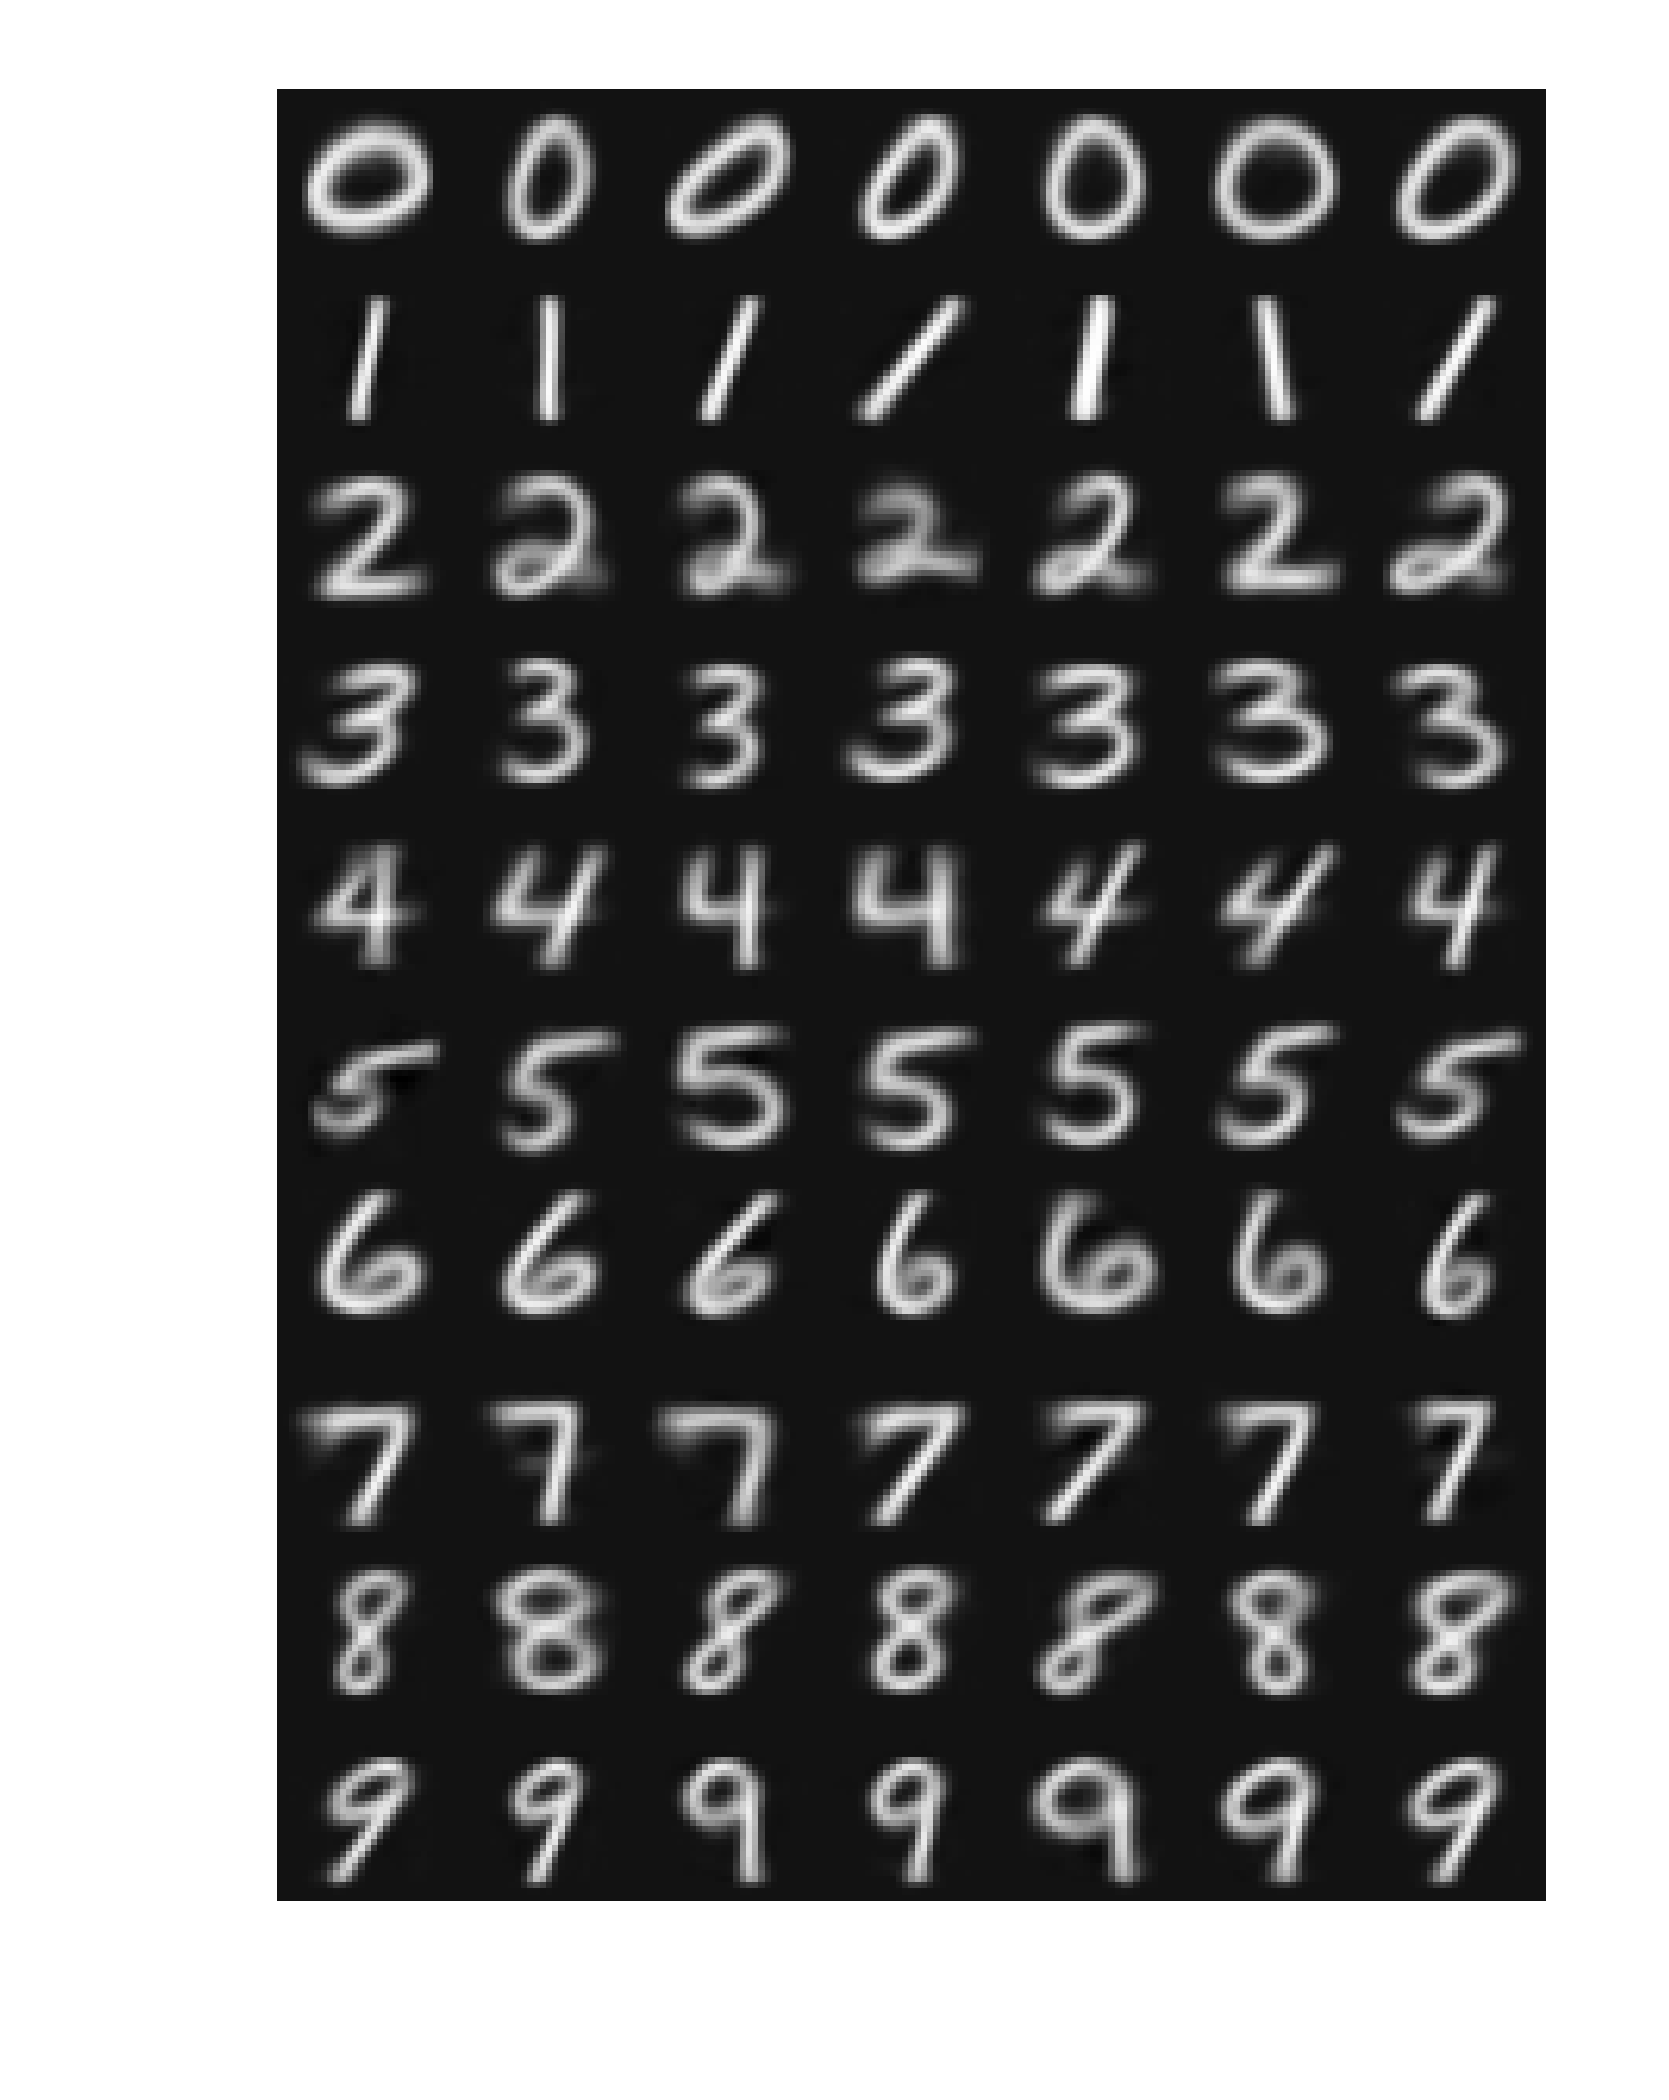

In [20]:
img = np.zeros([C*29,K*29])
for i in range (C):
    for j in range (K):
        k = i * K + j
        img[i*29:i*29+28, j*29:j*29+28] = np.reshape(c[k,:], [28,28])

plt.axis('off')        
imh = plt.imshow (img, cmap='gray');
plt.show()

In [24]:
XTest = MnistTestX
yTest = MnistTestY

score = 0.0
for j in range (XTest.shape[0]):
    x = np.array(XTest[j,:],dtype=float, ndmin = 2)            
    t = yTest[j]
    x_repeated = np.repeat(x,C*K, axis = 0)
    d = c - x_repeated
    d **= 2
    d = np.sum(d, axis = 1)
    min_idx = np.argmin(d)
    y = int (min_idx / K)
    if (y == t):
        score += 1
print ('Accuracy on test data = {0}\%'.format (score/XTest.shape[0] * 100))

Accuracy on test data = 91.4\%
